In [1]:
import pandas as pd
import statsmodels.tsa.stattools
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
statsmodels.tsa.stattools.adfuller

<function statsmodels.tsa.stattools.adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)>

In [3]:
df = pd.read_csv('/home/yasser/Desktop/hadoop/data/data_wheather/Barcelona.csv')
df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01,15,9,0.0,8.7,4,32,11:58 AM,11:31 PM,09:18 AM,...,11,30,81,0.0,1020,15,10,175,7,Barcelona
1,2009-01-02,13,8,0.0,5.2,3,39,12:19 PM,No moonset,09:18 AM,...,8,86,87,1.1,1018,13,7,200,5,Barcelona
2,2009-01-03,10,6,0.0,5.2,2,46,12:40 PM,12:35 AM,09:18 AM,...,17,62,86,1.6,1016,10,7,67,11,Barcelona
3,2009-01-04,13,5,0.0,8.7,3,53,01:03 PM,01:41 AM,09:18 AM,...,19,10,74,0.0,1018,13,10,136,12,Barcelona
4,2009-01-05,10,4,0.0,8.7,3,59,01:30 PM,02:50 AM,09:18 AM,...,22,17,62,0.0,1016,10,10,305,13,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,2022-05-27,26,21,0.0,14.5,5,22,04:50 AM,06:25 PM,06:23 AM,...,14,46,50,0.0,1019,26,10,274,9,Barcelona
4895,2022-05-28,28,21,0.0,14.5,7,15,05:13 AM,07:30 PM,06:22 AM,...,16,12,53,0.0,1013,28,10,241,10,Barcelona
4896,2022-05-29,23,20,0.0,13.5,6,8,05:39 AM,08:33 PM,06:22 AM,...,13,12,63,0.0,1008,23,10,114,11,Barcelona
4897,2022-05-30,23,19,0.0,14.5,6,1,06:09 AM,09:36 PM,06:21 AM,...,14,8,54,0.0,1009,23,10,83,11,Barcelona


In [4]:
df = df[['date_time', 'maxtempC']]
df

,date_time,maxtempC
0,2009-01-01,15
1,2009-01-02,13
2,2009-01-03,10
3,2009-01-04,13
4,2009-01-05,10
...,...,...
4894,2022-05-27,26
4895,2022-05-28,28
4896,2022-05-29,23
4897,2022-05-30,23


In [5]:
# DROP NAN

df = df[df['maxtempC'].notnull()]
df

,date_time,maxtempC
0,2009-01-01,15
1,2009-01-02,13
2,2009-01-03,10
3,2009-01-04,13
4,2009-01-05,10
...,...,...
4894,2022-05-27,26
4895,2022-05-28,28
4896,2022-05-29,23
4897,2022-05-30,23


In [6]:
# DATETIME TYPE

type(df.loc[0]['date_time'])

str

In [7]:
df.rename(columns={'date_time' : 'date'}, inplace=True)
df.rename(columns={'maxtempC' : 'temperature'}, inplace=True)

In [8]:
df

,date,temperature
0,2009-01-01,15
1,2009-01-02,13
2,2009-01-03,10
3,2009-01-04,13
4,2009-01-05,10
...,...,...
4894,2022-05-27,26
4895,2022-05-28,28
4896,2022-05-29,23
4897,2022-05-30,23


In [9]:
df['date'] = pd.to_datetime(df['date'])
df

,date,temperature
0,2009-01-01,15
1,2009-01-02,13
2,2009-01-03,10
3,2009-01-04,13
4,2009-01-05,10
...,...,...
4894,2022-05-27,26
4895,2022-05-28,28
4896,2022-05-29,23
4897,2022-05-30,23


<AxesSubplot:xlabel='date'>

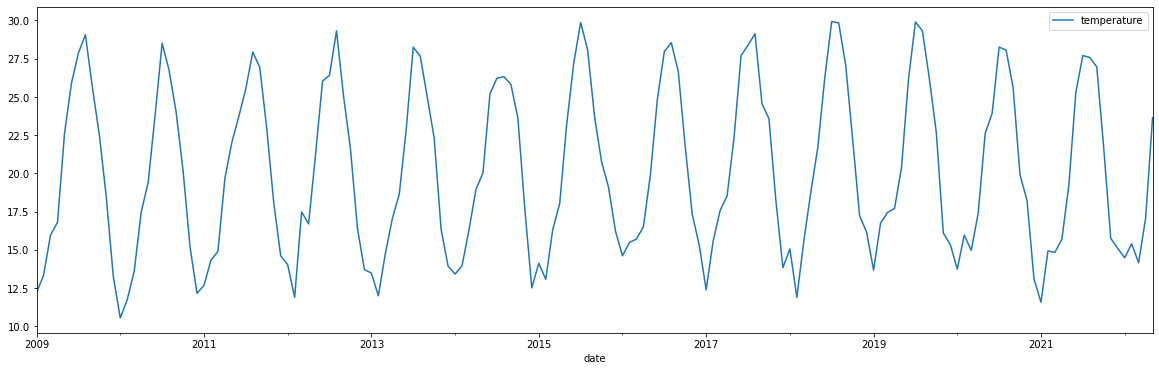

In [10]:
df.set_index('date').groupby(pd.Grouper(freq="M")).mean().plot(figsize=(20,6))

In [13]:
df

,date,temperature
0,2009-01-01,15
1,2009-01-02,13
2,2009-01-03,10
3,2009-01-04,13
4,2009-01-05,10
...,...,...
4894,2022-05-27,26
4895,2022-05-28,28
4896,2022-05-29,23
4897,2022-05-30,23


In [14]:
# SET DATE TO INDEX

df = df.set_index('date')
df

,temperature
date,
2009-01-01,15
2009-01-02,13
2009-01-03,10
2009-01-04,13
2009-01-05,10
...,...
2022-05-27,26
2022-05-28,28
2022-05-29,23


In [15]:
df.describe()

,temperature
count,4899.000000
mean,20.129822
std,5.966276
min,3.000000
25%,15.000000
50%,20.000000
75%,25.000000
max,35.000000


### VISUALIZATION

<AxesSubplot:xlabel='date'>

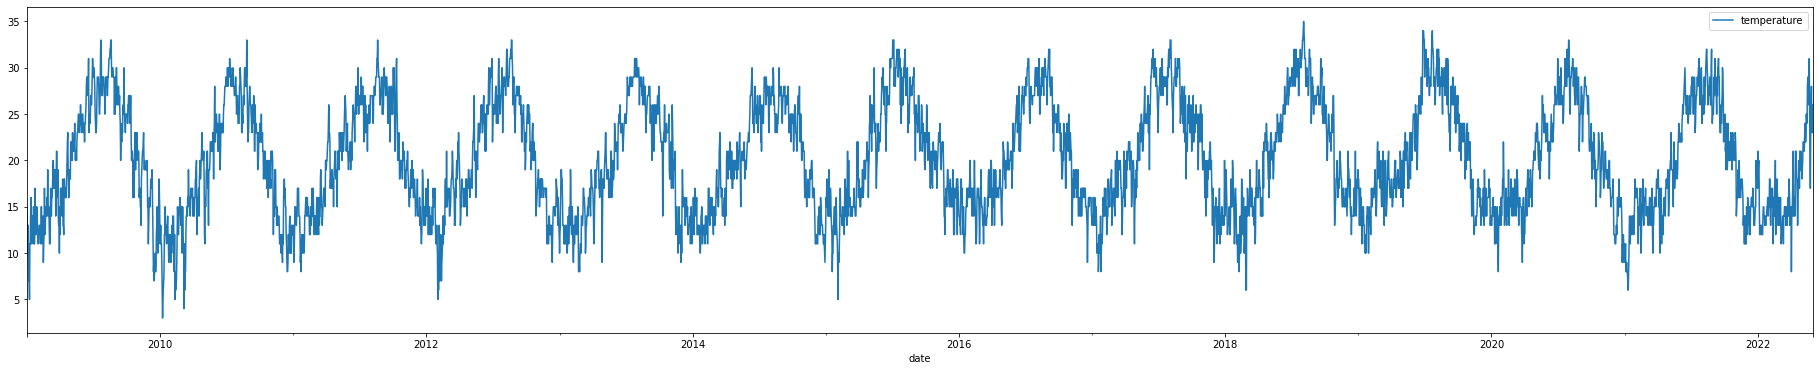

In [16]:
df.plot(figsize=(32,6))

In [77]:
df.tail()

,temperature
date,
2022-01-01,21
2022-02-01,15
2022-03-01,15
2022-04-01,15
2022-05-01,19


In [78]:
def ad_test(dataset):
    df_test = statsmodels.tsa.stattools.adfuller(dataset, autolag='AIC')
    print("P-Value : ", df_test[1])

In [79]:
ad_test(df['temperature'])

P-Value :  0.12064419441272989


### P-Value < .05 it means that the dataset is stationary
### Stationary Data : 
### In mathematics and statistics, a stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time

### AUTO_ARIMA

In [80]:
df

,temperature
date,
2009-01-01,15
2009-02-01,11
2009-03-01,14
2009-04-01,15
2009-05-01,22
...,...
2022-01-01,21
2022-02-01,15
2022-03-01,15


In [81]:
df = df.groupby(pd.Grouper(freq="M")).max()
df

,temperature
date,
2009-01-31,15
2009-02-28,11
2009-03-31,14
2009-04-30,15
2009-05-31,22
...,...
2022-01-31,21
2022-02-28,15
2022-03-31,15


In [82]:
df = df.loc[:'2021-01-31']
df

,temperature
date,
2009-01-31,15
2009-02-28,11
2009-03-31,14
2009-04-30,15
2009-05-31,22
...,...
2020-09-30,25
2020-10-31,24
2020-11-30,22


In [83]:
df = df.loc['2015-01-31' : '2021-01-31']
df

,temperature
date,
2015-01-31,13
2015-02-28,12
2015-03-31,18
2015-04-30,16
2015-05-31,24
...,...
2020-09-30,25
2020-10-31,24
2020-11-30,22


In [84]:
auto_arima(df['temperature'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=475.974, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=402.318, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=415.433, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=656.540, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=431.640, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=404.059, Time=0.69 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=397.882, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=408.445, Time=0.15 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=395.841, Time=0.86 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=408.101, Time=0.32 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=397.782, Time=0.88 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=39

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [85]:
len(df)

73

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20059D+00    |proj g|=  2.51911D-01


/home/yasser/.env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  2.09206D+00    |proj g|=  3.21360D-02

At iterate   10    f=  2.07936D+00    |proj g|=  3.34067D-03

At iterate   15    f=  2.07839D+00    |proj g|=  1.41958D-03

At iterate   20    f=  2.07826D+00    |proj g|=  1.09038D-03

At iterate   25    f=  2.07824D+00    |proj g|=  1.64704D-04

At iterate   30    f=  2.07824D+00    |proj g|=  5.23346D-05

At iterate   35    f=  2.07824D+00    |proj g|=  3.40775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     48      1     0     0   3.418D-05   2.078D+00
  F =   2.0782358910229162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

<AxesSubplot:xlabel='date'>

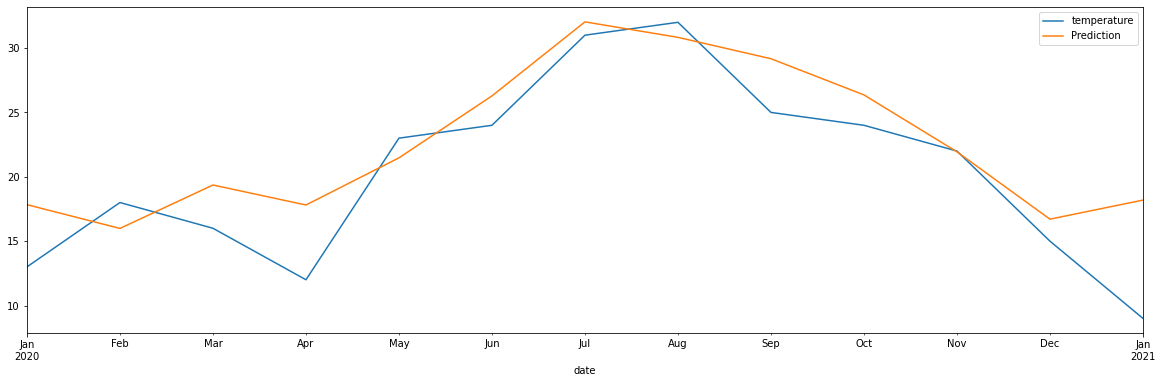

In [86]:
# SARIMAX(0, 0, 1)x(2, 0, [], 12)	


len(df)
train = df.iloc[:60]
test = df.iloc[60:]
# print(len(train))
# print(len(test))
# mod = SARIMAX(df['temperature'], order=(0, 0, 1), seasonal_order=(0, 0, 1, 12))
# model = SARIMAX(train['temperature'], order=(1, 0 ,0), seasonal_order=(1, 0, 2, 12))
model = SARIMAX(train['temperature'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
model = model.fit()
start = len(train)
end = len(train) + len(test) -1
prediction = model.predict(start, end).rename('Prediction')
ax = test['temperature'].plot(legend=True, figsize=(20,6))
prediction.plot(legend=True)

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -124.694
Date:                            Fri, 22 Jul 2022   AIC                            259.388
Time:                                    00:58:28   BIC                            268.639
Sample:                                01-31-2015   HQIC                           262.869
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4351      0.231     -1.882      0.060      -0.888       0.018
ma.L1         -0.2589      0.276     -0.939      0.348      -0.799       0.282
ar.S.L12       0.2368      0.440      0.539      0.590      -0.625       1.099
ma.S.L12      -0.9981     94.751     -0.011      0.992    -186.707     184.710
sigma2         8.5535    808.195      0.011      0.992   -1575.481    1592.587
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.97   Prob(JB):                         0.47
Heteroskedasticity (H):               0.36   Skew:                            -0.10
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
from pandas.tseries.offsets import DateOffset

In [89]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,60)]
future_dates

[Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-31 00:00:00'),
 Timestamp('2022-01-31 00:00:00'),
 Timestamp('2022-02-28 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-30 00:00:00'),
 Timestamp('2022-05-31 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-31 00:00:00'),
 Timestamp('2022-08-31 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-

In [90]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dates_df.tail()

,temperature
2025-08-31,NaN
2025-09-30,NaN
2025-10-31,NaN
2025-11-30,NaN
2025-12-31,NaN


In [91]:
future_df = pd.concat([df, future_dates_df])

In [92]:
len(future_df)

132

In [93]:
len(df)

73

<AxesSubplot:>

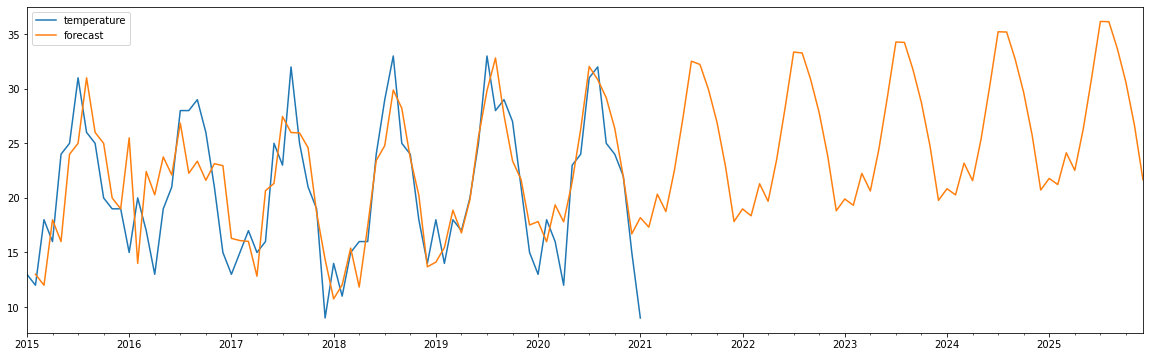

In [94]:
# future_df['forecast'] = model.predict(start=len(train), end=len(future_df)).rename('Prediction')
future_df['forecast'] = model.predict(1, end=len(future_df)).rename('Prediction')

future_df[['temperature', 'forecast']].plot(figsize=(20,6))

In [95]:
future_df.head()

,temperature,forecast
2015-01-31,13,NaN
2015-02-28,12,12.999915
2015-03-31,18,12.000050
2015-04-30,16,17.999899
2015-05-31,24,16.000070


In [96]:
future_df.loc['2024-08-31']

temperature          NaN
forecast       35.196087
Name: 2024-08-31 00:00:00, dtype: object

In [97]:
print(future_df.loc['2020-08-31'])
print(future_df.loc['2021-08-31'])
print(future_df.loc['2022-08-31'])
print(future_df.loc['2023-08-31'])
print(future_df.loc['2024-08-31'])
# print(future_df.loc['2025-05-01'])

temperature           32
forecast       30.831589
Name: 2020-08-31 00:00:00, dtype: object
temperature         NaN
forecast       32.22427
Name: 2021-08-31 00:00:00, dtype: object
temperature          NaN
forecast       33.275218
Name: 2022-08-31 00:00:00, dtype: object
temperature          NaN
forecast       34.245235
Name: 2023-08-31 00:00:00, dtype: object
temperature          NaN
forecast       35.196087
Name: 2024-08-31 00:00:00, dtype: object


### SAVE THE MODEL

In [98]:
import pickle

In [100]:
with open('/home/yasser/Desktop/hadoop/prediction/prediction_pickle', 'wb') as f:
    pickle.dump(model, f)